In [65]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
sns.set()

url = "https://github.com/renatoquiliche/Insurance-Mathematics-Economics-ADR/blob/main/Databases/insurance.csv?raw=true"

data_insurance = pd.read_csv(url)

In [66]:
from math import inf

data_insurance["BMI"] = pd.cut(data_insurance.bmi,bins=[0, 30, inf],labels=["Non-obesity(BMI<30)", "Obesity (BMI>30)"])

data_insurance["smoker"] = data_insurance["smoker"].astype("category")

In [67]:
data_insurance["smoker"] = data_insurance["smoker"].str.replace('no','Non-smoker')
data_insurance["smoker"] = data_insurance["smoker"].str.replace('yes','Smoker')
data_insurance['Category'] = data_insurance["BMI"].astype(str) + " AND " + data_insurance["smoker"].astype(str) 

In [68]:
data_insurance.loc[data_insurance['smoker'] == "Non-smoker", 'Cluster'] = 1
data_insurance.loc[data_insurance['Category'] == "Non-obesity(BMI<30) AND Smoker", 'Cluster'] = 2
data_insurance.loc[data_insurance['Category'] == "Obesity (BMI>30) AND Smoker", 'Cluster'] = 3

In [69]:
data_insurance['Category'].value_counts()

Obesity (BMI>30) AND Non-smoker       561
Non-obesity(BMI<30) AND Non-smoker    503
Obesity (BMI>30) AND Smoker           144
Non-obesity(BMI<30) AND Smoker        130
Name: Category, dtype: int64

In [70]:
input_simulation = data_insurance[['charges', 'Category', 'Cluster']]
#input_simulation['Cluster'] = input_simulation['Cluster'].astype(int)

<AxesSubplot:xlabel='charges', ylabel='Count'>

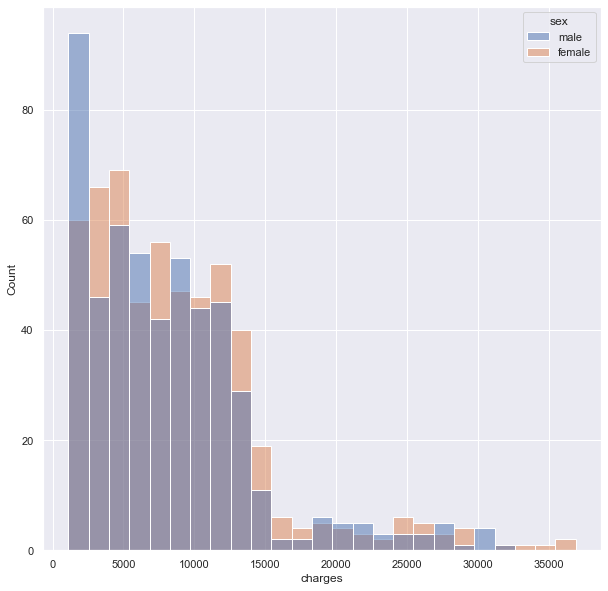

In [71]:
plt.figure(figsize=(10,10))
sns.histplot(data=data_insurance[data_insurance['smoker']=='Non-smoker'], x='charges', hue='sex')

<AxesSubplot:xlabel='charges', ylabel='Density'>

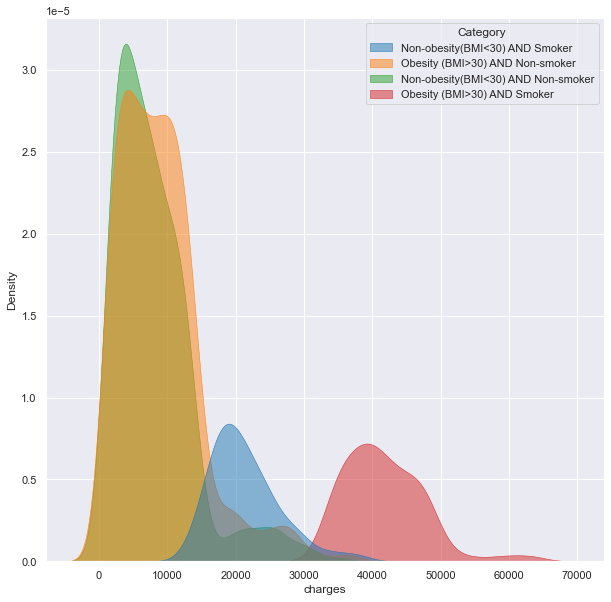

In [72]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=input_simulation, x='charges', hue='Category', fill=True, palette='tab10', alpha=.5, linewidth=.5)

In [73]:
input_simulation.loc[data_insurance["smoker"] == 'Non-smoker', 'Category'] = 'Non-smoker'

<AxesSubplot:xlabel='charges', ylabel='Density'>

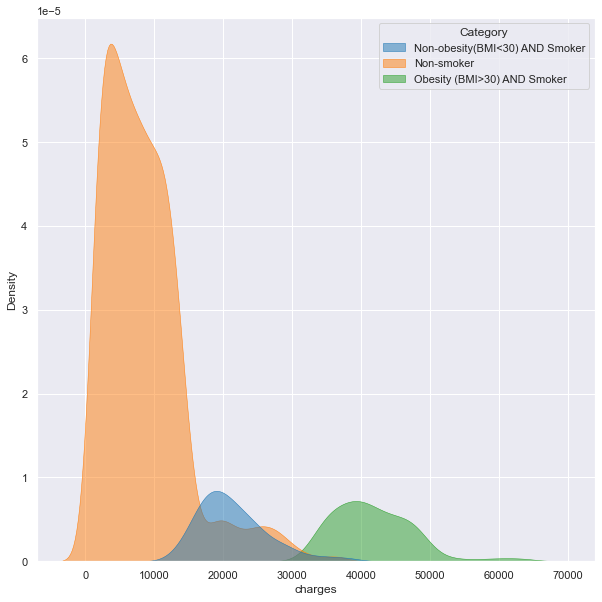

In [74]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=input_simulation, x='charges', hue='Category', fill=True, palette='tab10', alpha=.5, linewidth=.5)

In [75]:
input_simulation.to_csv('..\..\Databases\contracts.csv', index=False)